In [1]:
import splat
import wisps
import pandas as pd
import numpy as np
from wisps.simulations import volume_bins
import astropy.units as u
from tqdm import tqdm

In [2]:
candidates=pd.read_pickle(wisps.OUTPUT_FILES+'/candidates.pkl')
fields=pd.read_csv(wisps.OUTPUT_FILES+'/observation_log_with_mag.csv')

In [14]:
import splat.empirical as spe
import splat
def wfc3_to_2mass_distance(ap_mag, flt, stds, two_mass_flt):
    ds=[]
    for std in stds:
        color=spe.filterMag(std, flt)[0]-spe.filterMag(std,two_mass_flt)[0]
        #print (color)
        M, unc=spe.filterMag(std, flt)
        m=float(ap_mag)-float(color)
        ds.append(10**((m+5.0-M)/5.0))
    return ds

In [4]:
def create_pointing(grism_id):
    pointing=None
    if grism_id.startswith('Par'): return 'wisps-'+grism_id.split('Par')[-1].split('_')[0]
    else: return grism_id.split('-G141')[0]

In [5]:
candidates_ps=[create_pointing(x.name) for x in candidates]

In [6]:
#find fields that have brown dwarfs/fields of concern
fields_with_bds=fields[fields.POINTING.isin(candidates_ps)]
coords=np.array([fields['RA (deg)'].as_matrix(), fields[ 'DEC(deg)'].as_matrix()])

In [7]:
stds=[splat.getStandard(splat.typeToNum(x)) for x in np.arange(17, 40)]

In [12]:
far_dist1=[wfc3_to_2mass_distance(ap_mag, 'NICMOS F110W', stds, '2MASS J') for ap_mag in fields['MIN_F110'] ]
#far_dist2=[wfc3_to_2mass_distance(ap_mag, 'NICMOS F140W', stds, '2MASS J') for ap_mag in fields['MIN_F140'] ]
#far_dist3=[wfc3_to_2mass_distance(ap_mag, 'NICMOS F160W', stds, '2MASS H') for ap_mag in fields['MIN_F160'] ]

100%|██████████| 23/23 [00:06<00:00,  3.83it/s]


In [15]:
near_dist1=[wfc3_to_2mass_distance(ap_mag, 'NICMOS F110W', stds, '2MASS J') for ap_mag in fields['MAX_F110'] ]
#near_dist2=[wfc3_to_2mass_distance(ap_mag, 'NICMOS F140W', stds, '2MASS J') for ap_mag in fields['MAX_F140'] ]
#near_dist3=[wfc3_to_2mass_distance(ap_mag, 'NICMOS F160W', stds, '2MASS H') for ap_mag in fields['MAX_F160'] ]

In [20]:
np.array(far_dist1)-np.array(near_dist1)

array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [4.34682163e+08, 4.12816759e+08, 3.91387894e+08, ...,
        2.10670419e+08, 1.96289858e+08, 1.93103700e+08],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

In [11]:

#bin the volume
volumes=abs(np.array([volume_bins(coord[0]*u.degree, coord[1]*u.degree, dist, dds, 4.6) for coord in coords.T])[0])

NameError: name 'dist' is not defined

In [12]:
#galacto-centric distances
cand_distances=np.array([x.distance['val'].value for x in candidates])

In [13]:
numbers=np.array([len(cand_distances[cand_distances<x]) for x in  np.linspace(min_distance, max_distance, 50)])

NameError: name 'min_distance' is not defined

In [ ]:
density=numbers/volumes

In [15]:
otput_data={'fields': fields_with_bds, 'density': density, 'distance':8000-dds}
import pickle
output_file = open( wisps.OUTPUT_FILES+'//model_input.pkl', 'wb')
pickle.dump(output_data, output_file)
output_file.close()

In [21]:
df=wisps.COMBINED_PHOTO_SPECTRO_DATA

In [24]:
df['POINTING']=df.grism_id.apply(create_pointing)

In [26]:
new_df=df.merge(fields, on='POINTING', how='inner')

In [40]:
def transform_to_array(x):
    x=np.array(x)
    if len(x)==1: return x
    else: return x[0]

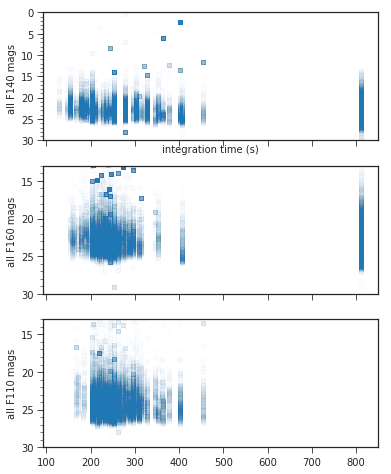

In [76]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
fig, (ax, ax1, ax2)=plt.subplots( 3, sharex=True, sharey=True, figsize=(6, 8))
ax.scatter( new_df['EXPOSURE (s)'], new_df['F140'].apply(transform_to_array), s=10, alpha=0.01, marker=',')
ax1.scatter( new_df['EXPOSURE (s)'], new_df['F160'].apply(transform_to_array), s=10, alpha=0.01, marker=',')
ax2.scatter( new_df['EXPOSURE (s)'], new_df['F110'].apply(transform_to_array), s=10, alpha=0.01, marker=',')
ax.set_xlabel('integration time (s)')
ax.set_ylabel('all F140 mags ')
ax1.set_ylabel('all F160 mags ')
ax2.set_ylabel('all F110 mags')

ax.set_ylim([13, 30])
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()

t=ax.set_yticks(np.arange(0, 30, 1), minor=True)

In [ ]:
len(fields[pd.isna(fields['MAX_F160'])])

In [ ]:
volumes

In [72]:
np.arange(10, 30, 1)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])